In [88]:
import numpy as np
import pandas as pd
import json
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt

Alexandra Hurst
# Problem 1
Find some aspect of your final research project where a naïve Bayes classifier is appropriate, and apply Naive Bayes to that.  Compare the result to what logistic regression and support vector machines give you on the same data. 

My dataset is currently made up of around 25000 yelp restaurant summaries. An example of the dataset attributes I'm using is provided below. The goal is to use those attributes to predict how many stars a restaurant got on yelp.

In [59]:
yelp = []
yelp_pd = pd.DataFrame({'name' : [], 'casual' : [],'divey' : [],'hipster' : [],'intimate' : [],'romantic' : [],'touristy' : [],\
                        'trendy' : [],'upscale' : [],'RestaurantsAttire' : [],\
                         'RestaurantsDelivery' : [], 'RestaurantsReservations' : [], 'RestaurantsTakeout' : [],\
                        'stars' : []})
for line in open('dataset/business.json', 'r'):
    business=json.loads(line)
    if 'Restaurants' in business['categories']:
        yelp.append(business)
        try:
            yelp_pd = yelp_pd.append({'name' : business['name'], 'casual' : business['attributes']['Ambience']['casual'],'divey' : business['attributes']['Ambience']['divey'],'hipster' : business['attributes']['Ambience']['hipster'],'intimate' : business['attributes']['Ambience']['intimate'],'romantic' : business['attributes']['Ambience']['romantic']\
                                 ,'touristy' : business['attributes']['Ambience']['touristy'],\
                        'trendy' : business['attributes']['Ambience']['trendy'],'upscale' : business['attributes']['Ambience']['trendy'],'RestaurantsAttire' : business['attributes']['RestaurantsAttire'],\
                         'RestaurantsDelivery' : business['attributes']['RestaurantsDelivery'], 'RestaurantsReservations' : business['attributes']['RestaurantsReservations'], 'RestaurantsTakeout' : business['attributes']['RestaurantsTakeOut'],\
                        'stars' : business['stars']}, ignore_index=True)
        except:
            pass
        

In [77]:
yelp_pd.sample(5)

,RestaurantsAttire,RestaurantsDelivery,RestaurantsReservations,RestaurantsTakeout,casual,divey,hipster,intimate,name,romantic,stars,touristy,trendy,upscale
24074,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Buffalo Wild Wings,0.0,4,0.0,0.0,0.0
23762,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Bootleggers Modern American Smokehouse,0.0,8,0.0,0.0,0.0
285,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,I Roll Thai Ice Cream,0.0,8,0.0,0.0,0.0
23949,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Jimmy Hula's,0.0,8,0.0,0.0,0.0
12071,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,The Olive Mediterranean Grill,0.0,8,0.0,0.0,0.0


In [65]:
yelp_pd['stars'] = 2*yelp_pd['stars'].astype(int)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(yelp_pd.drop('stars', axis=1).drop('name', axis=1), yelp_pd['stars'], test_size=0.33, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Accuracy score for Naive Bayes: ", clf.score(X_test, y_test))

lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
lr.fit(X_train, y_train)
print("Accuracy score for LogRes: ", lr.score(X_test, y_test))

clf = SVC()
clf.fit(X_train, y_train) 
print("Accuracy score for SVM: ", clf.score(X_test, y_test))

Accuracy score for Naive Bayes:  0.461660755778
Accuracy score for LogRes:  0.462761403938
Accuracy score for SVM:  0.460437813379


### Conclusion
There is a weak correlation between the attributes given and the number of stars someone gives it. It is enough to predict correctly about half the time, which means this feature could be used to predict where someone would want to go based on their past choices.

# Problem 2
Plot the ROC (scikit-learn has an ROC function you can use) for the following classifiers on the scilit-learn cancer dataset with
    naïve Bayes,
    logistic regression, and
    support vector machines (with probabilities, not just classification)

In [82]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

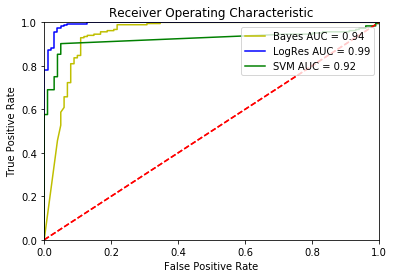

In [94]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'y', label = 'Bayes AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])


lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
lr.fit(X_train, y_train)
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'LogRes AUC = %0.2f' % roc_auc)

clf = SVC(probability=True)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'SVM AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Problem 3
Describe an appropriate cost function of the form a*FPR + b*FNR (that is, choose meaningful values of a and b) for the cancer dataset, assuming you are an insurance company that has to pay medical costs of treatment and also life insurance at death for each patient.  Given that cost function, use the ROC in the traditional manner (not Jarvis's new way) to identify the optimal choice of threshold τ for each of the three classifiers in part 2.

We would want constant a to outweigh b significantly. A false positive isn't that big of a deal, and a biopsy would be way cheaper than treating late-diagnosed cancer or funeral costs. There really are just very few scenerios where it would make more financial sense to get a false negative and postpone treatment. Choose a=.9 and b=.1